# **Canadian Foreign Trade History**

## Introduction
As an International Business graduate with a passion for trade and economic development, I have always been captivated by the complexities of global commerce. This project, which delves into Canada’s trade history, is more than just an analytical exercise—it’s a stepping stone toward my long-term goal of building an export company specializing in fresh fruits and vegetables from Latin America to Canada and the U.S.

Understanding historical trade patterns is key to spotting opportunities and navigating potential challenges in the market. By analyzing decades of import and export data, I aim to uncover insights into Canada’s trade relationships, particularly in the context of Free Trade Agreements (FTAs). This exploration not only sharpens my ability to interpret economic trends but also strengthens my strategic planning skills, equipping me and anyone with access to this insights, to make well-informed business decisions in the future.

Beyond personal aspirations, this project highlights the broader impact of international trade. Strengthening trade between Canada and the world has tangible benefits: it drives economic growth, creates job opportunities, and supports local farmers by providing them with access to new markets. Moreover, increasing the flow of high-quality agricultural products ensures a steady supply of fresh, nutritious food to meet growing consumer demand in Canada and the U.S, whose recent "Trade War" is affecting us.

At its core, trade is about connection—linking producers with consumers, businesses with opportunities, and economies with growth. By diving deep into the data, this project not only brings me closer to my entrepreneurial vision but also reinforces the fundamental role of international trade in fostering sustainable economic development.
## Project Outline
### Part 1. **[Data Scrubbing](#data-scrubbing)**
#### &emsp;1.1 **[FTAs Monthly Database](#db1)**
#### &emsp;1.2 **[Country Yearly Database](#db2)**
### Part 2. **[Interpretation](#interpretation)**
#### &emsp;2.1 **[Distribution of Free Trade Agreements](#d1)**
#### &emsp;2.2 **[Distribution of Countries](#d2)**
#### &emsp;2.3 **[Distribution of Categories](#d4)**
#### &emsp;2.4 **[Heatmap of Top 10 Product Descriptions](#h5)**
### Part 3. **[Modelling](#modelling)**
#### &emsp;3.1 **[Clustering / Segmentation: Countries](#m1)**
#### &emsp;3.2 **[Clustering / Segmentation: FTAs](#m2)**
#### &emsp;3.3 **[SARIMA Forecast for Exports](#m3)**
### 4. **[Tableau Dashboard](https://public.tableau.com/views/TableauProject_17241256666710/Dashboard1?:language=es-ES&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)**

## Bibliography
- **Python Libraries Used:**
   - `pandas`: A powerful data manipulation and analysis library that provides data structures like DataFrames for handling structured data.
   - `numpy`: A fundamental package for numerical computing in Python, providing support for arrays, matrices, and a wide range of mathematical functions.
   - `plotly`: An interactive graphing library that makes it easy to create interactive plots, dashboards, and visualizations.
   - `scikit-learn`: A machine learning library that provides simple and efficient tools for data mining, data analysis, and machine learning tasks.
   - `matplotlib`: A comprehensive library for creating static, animated, and interactive visualizations in Python.
   - `seaborn`: A statistical data visualization library based on matplotlib, providing a high-level interface for drawing attractive and informative statistical graphics.
   - `statsmodels`: A library for estimating and testing statistical models, performing statistical tests, and conducting data exploration.
- **References:**
  - [FTAs Monthly Database](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1210017401): Statistics Canada. Table 12-10-0174-01 Merchandise imports and exports, customs-based, by free trade agreement and by commodity (x 1,000).
  - [Country Yearly Database](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1210017101): Statistics Canada. Table 12-10-0171-01 Canadian international merchandise trade by country and by product section, customs-based, annual (x 1,000).

Feel free to navigate through the sections, and learn about the analysis!

---

<a id="data-scrubbing"></a>
## **1. Data Scrubbing**

### Importing Libraries

In [1]:
import re

import numpy as np
import pandas as pd
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'plotly_mimetype'
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

print("modules are imported")

modules are imported


<a id="db1"></a>
### **1.1 FTAs Monthly Database**
### Reading the database

In [2]:
df = pd.read_csv("db_canada.csv", on_bad_lines="skip", low_memory=False)
df.head()

,REF_DATE,GEO,DGUID,Trade,Free Trade Agreement,North American Product Classification System (NAPCS),UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1988-01,Canada,2021A000011124,Import,Total of all countries,Total of all merchandise,Dollars,81,thousands,3,v1566929544,1.1.1.1,12417833.7,NaN,NaN,NaN,1
1,1988-01,Canada,2021A000011124,Import,Total of all countries,"Farm, fishing and intermediate food products [...",Dollars,81,thousands,3,v1566929545,1.1.1.2,438401.8,NaN,NaN,NaN,1
2,1988-01,Canada,2021A000011124,Import,Total of all countries,Farm and fishing products [C111],Dollars,81,thousands,3,v1566929546,1.1.1.3,374211.3,NaN,NaN,NaN,1
3,1988-01,Canada,2021A000011124,Import,Total of all countries,Live animals [111],Dollars,81,thousands,3,v1566929547,1.1.1.4,11592.8,NaN,NaN,NaN,1
4,1988-01,Canada,2021A000011124,Import,Total of all countries,Wheat [112],Dollars,81,thousands,3,v1566929548,1.1.1.5,0.3,NaN,NaN,NaN,1


In [3]:
df.shape

(4528800, 17)

### Analyzing the columns

In [4]:
cols = list(df.columns)
print(cols)

['REF_DATE', 'GEO', 'DGUID', 'Trade', 'Free Trade Agreement', 'North American Product Classification System (NAPCS)', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'VALUE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS']


In [5]:
# Define a list of columns that are not necessary for our analysis
useless_columns = [
    "GEO",
    "DGUID",
    "UOM",
    "UOM_ID",
    "SCALAR_FACTOR",
    "SCALAR_ID",
    "VECTOR",
    "STATUS",
    "SYMBOL",
    "TERMINATED",
    "DECIMALS",
]

# Drop the columns listed in 'useless_columns' from the DataFrame
# This step helps to reduce the dataset to only the relevant
df_clean = df.drop(useless_columns, axis=1)

In [6]:
df_clean.rename(
    columns={
        "REF_DATE": "Date",
        "North American Product Classification System (NAPCS)": "Product",
        "COORDINATE": "Coordinate",
        "VALUE": "Value",
    },
    inplace=True,
)
df_clean.head()

,Date,Trade,Free Trade Agreement,Product,Coordinate,Value
0,1988-01,Import,Total of all countries,Total of all merchandise,1.1.1.1,12417833.7
1,1988-01,Import,Total of all countries,"Farm, fishing and intermediate food products [...",1.1.1.2,438401.8
2,1988-01,Import,Total of all countries,Farm and fishing products [C111],1.1.1.3,374211.3
3,1988-01,Import,Total of all countries,Live animals [111],1.1.1.4,11592.8
4,1988-01,Import,Total of all countries,Wheat [112],1.1.1.5,0.3


### Removing the duplicates

In [7]:
# Identyfing the different categories under 'Products'
df_clean["Product"].unique()

array(['Total of all merchandise',
       'Farm, fishing and intermediate food products [C11]',
       'Farm and fishing products [C111]', 'Live animals [111]',
       'Wheat [112]', 'Canola (including rapeseed) [113]',
       'Fresh fruit, nuts and vegetables, and pulse crops [114]',
       'Other crop products [115]', 'Other animal products [116]',
       'Fish, crustaceans, shellfish and other fishery products [121]',
       'Animal feed [181]', 'Intermediate food products [C112]',
       'Intermediate food products [182]', 'Energy products [C12]',
       'Crude oil and crude bitumen [C121]',
       'Crude oil and bitumen [141]',
       'Natural gas, natural gas liquids and related products [C122]',
       'Natural gas [142]',
       'Natural gas liquids (including condensate) and related products [143]',
       'Coal [C123]', 'Coal [144]',
       'Nuclear fuel and other energy products [C124]',
       'Nuclear fuel and other energy products [145]',
       'Electricity [C125]', 'Ele

In [8]:
# Filter the data to include only the specified products and FTA as 'Total of all countries'
filtered_data = df_clean[
    df_clean["Product"].isin(
        [
            "Passenger cars and light trucks [C191]",
            "Passenger cars and light trucks [411]",
        ]
    )
    & (df_clean["Free Trade Agreement"] == "Total of all countries")
]

# Display the first few rows of the filtered data
filtered_data.head(10)

,Date,Trade,Free Trade Agreement,Product,Coordinate,Value
105,1988-01,Import,Total of all countries,Passenger cars and light trucks [C191],1.1.1.106,829286.8
106,1988-01,Import,Total of all countries,Passenger cars and light trucks [411],1.1.1.107,829286.8
5205,1988-01,Export,Total of all countries,Passenger cars and light trucks [C191],1.2.1.106,1668955.1
5206,1988-01,Export,Total of all countries,Passenger cars and light trucks [411],1.2.1.107,1668955.1
10305,1988-02,Import,Total of all countries,Passenger cars and light trucks [C191],1.1.1.106,1428949.5
10306,1988-02,Import,Total of all countries,Passenger cars and light trucks [411],1.1.1.107,1428949.5
15405,1988-02,Export,Total of all countries,Passenger cars and light trucks [C191],1.2.1.106,2185848.1
15406,1988-02,Export,Total of all countries,Passenger cars and light trucks [411],1.2.1.107,2185848.1
20505,1988-03,Import,Total of all countries,Passenger cars and light trucks [C191],1.1.1.106,1333600.4
20506,1988-03,Import,Total of all countries,Passenger cars and light trucks [411],1.1.1.107,1333600.4


In [9]:
# Remove the codes from the Product names (text inside brackets)
df_clean["Description"] = df_clean["Product"].apply(
    lambda x: re.sub(r"\[.*?\]", "", x).strip()
)

# Drop the 'Product' column
df_clean = df_clean.drop(columns=["Product"])
df_clean.head()

,Date,Trade,Free Trade Agreement,Coordinate,Value,Description
0,1988-01,Import,Total of all countries,1.1.1.1,12417833.7,Total of all merchandise
1,1988-01,Import,Total of all countries,1.1.1.2,438401.8,"Farm, fishing and intermediate food products"
2,1988-01,Import,Total of all countries,1.1.1.3,374211.3,Farm and fishing products
3,1988-01,Import,Total of all countries,1.1.1.4,11592.8,Live animals
4,1988-01,Import,Total of all countries,1.1.1.5,0.3,Wheat


In [10]:
# Remove duplicate rows without aggregation
df_clean = df_clean.drop_duplicates(
    subset=["Date", "Description", "Value", "Free Trade Agreement", "Trade"]
)

# Filter the data to include only the specified products and FTA as 'Total of all countries'
filtered_data = df_clean[
    df_clean["Description"].isin(["Passenger cars and light trucks"])
    & (df_clean["Free Trade Agreement"] == "Total of all countries")
]

# Display the first few rows of the filtered data
filtered_data.head(10)

,Date,Trade,Free Trade Agreement,Coordinate,Value,Description
105,1988-01,Import,Total of all countries,1.1.1.106,829286.8,Passenger cars and light trucks
5205,1988-01,Export,Total of all countries,1.2.1.106,1668955.1,Passenger cars and light trucks
10305,1988-02,Import,Total of all countries,1.1.1.106,1428949.5,Passenger cars and light trucks
15405,1988-02,Export,Total of all countries,1.2.1.106,2185848.1,Passenger cars and light trucks
20505,1988-03,Import,Total of all countries,1.1.1.106,1333600.4,Passenger cars and light trucks
25605,1988-03,Export,Total of all countries,1.2.1.106,2099962.4,Passenger cars and light trucks
30705,1988-04,Import,Total of all countries,1.1.1.106,1405613.7,Passenger cars and light trucks
35805,1988-04,Export,Total of all countries,1.2.1.106,2111173.4,Passenger cars and light trucks
40905,1988-05,Import,Total of all countries,1.1.1.106,1408191.8,Passenger cars and light trucks
46005,1988-05,Export,Total of all countries,1.2.1.106,2113811.4,Passenger cars and light trucks


In [11]:
# Group by 'Date', 'Free Trade Agreement', 'Description', and 'Trade' and sum the 'Value' column
df_clean = df_clean.groupby(
    ["Date", "Free Trade Agreement", "Description", "Trade"], as_index=False
)["Value"].sum()

# Filter the data to include only the specified products and FTA as 'Total of all countries'
filtered_data = df_clean[
    df_clean["Description"].isin(["Passenger cars and light trucks"])
    & (df_clean["Free Trade Agreement"] == "Total of all countries")
]

# Display the first few rows of the filtered data
filtered_data.head(10)

,Date,Free Trade Agreement,Description,Trade,Value
8576,1988-01,Total of all countries,Passenger cars and light trucks,Export,1668955.1
8577,1988-01,Total of all countries,Passenger cars and light trucks,Import,829286.8
17484,1988-02,Total of all countries,Passenger cars and light trucks,Export,2185848.1
17485,1988-02,Total of all countries,Passenger cars and light trucks,Import,1428949.5
26392,1988-03,Total of all countries,Passenger cars and light trucks,Export,2099962.4
26393,1988-03,Total of all countries,Passenger cars and light trucks,Import,1333600.4
35300,1988-04,Total of all countries,Passenger cars and light trucks,Export,2111173.4
35301,1988-04,Total of all countries,Passenger cars and light trucks,Import,1405613.7
44208,1988-05,Total of all countries,Passenger cars and light trucks,Export,2113811.4
44209,1988-05,Total of all countries,Passenger cars and light trucks,Import,1408191.8


### Dropping CUSMA duplicates

In [12]:
# Identyfing the different categories under 'Free Trade Agreement'
df_clean["Free Trade Agreement"].unique()

array(['Canada-ASEAN Free Trade Agreement, discussions',
       'Canada-Caribbean Community Trade Agreement, negotiations',
       'Canada-Chile Free Trade Agreement, in force from 1997/07 to present',
       'Canada-China Free Trade Agreement, discussions',
       'Canada-Colombia Free Trade Agreement, in force from 2011/08 to present',
       'Canada-Costa Rica Free Trade Agreement, in force from 2002/11 to present',
       'Canada-Dominican Republic Free Trade Agreement, negotiations',
       'Canada-European Free Trade Association (EFTA) Free Trade Agreement, in force from 2009/07 to present',
       'Canada-European Union: Comprehensive Economic and Trade Agreement (CETA), in force from 2017/09 to present',
       'Canada-Guatemala, Nicaragua and El Salvador Free Trade Agreement, negotiations',
       'Canada-Honduras Free Trade Agreement, in force from 2014/10 to present',
       'Canada-India Comprehensive Economic Partnership Agreement, negotiations',
       'Canada-Indonesia C

In [13]:
# Drop 'Canada-United States-Mexico Agreement (CUSMA), in force from 2020/07 to present'
df_clean = df_clean[df_clean["Free Trade Agreement"] != 'Canada-United States-Mexico Agreement (CUSMA), in force from 2020/07 to present']

# Change 'North American Free Trade Agreement (NAFTA), superseded by CUSMA, in force from 1994/01 to 2020/06' to 'Canada-United States-Mexico Agreement (CUSMA), preceeded by NAFTA'
df_clean["Free Trade Agreement"] = df_clean["Free Trade Agreement"].replace(
    'North American Free Trade Agreement (NAFTA), superseded by CUSMA, in force from 1994/01 to 2020/06',
    'Canada-United States-Mexico Agreement (CUSMA), preceeded by NAFTA'
)

# Identify the rows with the specified 'Free Trade Agreement' values
cusfta_rows = df_clean[df_clean["Free Trade Agreement"] == 'Canada-U.S. Free Trade Agreement (CUSFTA), superseded by NAFTA, in force from 1989/01 to 1993/12']
cusma_rows = df_clean[df_clean["Free Trade Agreement"] == 'Canada-United States-Mexico Agreement (CUSMA), preceeded by NAFTA']

# Find the common 'Value' between the two sets of rows
common_values = cusfta_rows[cusfta_rows["Value"].isin(cusma_rows["Value"])]

# Drop the rows with 'Canada-United States-Mexico Agreement (CUSMA), preceeded by NAFTA' that share the same 'Value'
df_clean = df_clean[~((df_clean["Free Trade Agreement"] == 'Canada-United States-Mexico Agreement (CUSMA), preceeded by NAFTA') & (df_clean["Value"].isin(common_values["Value"])))]

# Display the updated unique values of 'Free Trade Agreement'
df_clean["Free Trade Agreement"].unique()


array(['Canada-ASEAN Free Trade Agreement, discussions',
       'Canada-Caribbean Community Trade Agreement, negotiations',
       'Canada-Chile Free Trade Agreement, in force from 1997/07 to present',
       'Canada-China Free Trade Agreement, discussions',
       'Canada-Colombia Free Trade Agreement, in force from 2011/08 to present',
       'Canada-Costa Rica Free Trade Agreement, in force from 2002/11 to present',
       'Canada-Dominican Republic Free Trade Agreement, negotiations',
       'Canada-European Free Trade Association (EFTA) Free Trade Agreement, in force from 2009/07 to present',
       'Canada-European Union: Comprehensive Economic and Trade Agreement (CETA), in force from 2017/09 to present',
       'Canada-Guatemala, Nicaragua and El Salvador Free Trade Agreement, negotiations',
       'Canada-Honduras Free Trade Agreement, in force from 2014/10 to present',
       'Canada-India Comprehensive Economic Partnership Agreement, negotiations',
       'Canada-Indonesia C

### Final touches

In [14]:
# Drop rows where 'Description' is 'Total of all merchandise' or 'Free Trade Agreement' is 'Total of all countries'
df_clean = df_clean[
    (df_clean["Description"] != "Total of all merchandise") &
    (df_clean["Free Trade Agreement"] != "Total of all countries")
]

In [15]:
# Convert 'Value' to thousands
df_clean['Value'] = df_clean['Value'] * 1000

In [16]:
df_clean.isnull().sum()

Date                    0
Free Trade Agreement    0
Description             0
Trade                   0
Value                   0
dtype: int64

In [17]:
df_clean = df_clean.dropna()
df_clean.shape

(3664111, 5)

In [18]:
df_clean["Value"].describe()

count    3.664111e+06
mean     5.164507e+07
std      3.346071e+08
min      0.000000e+00
25%      0.000000e+00
50%      5.640000e+04
75%      2.873800e+06
max      2.042747e+10
Name: Value, dtype: float64

In [19]:
df_clean.head()

,Date,Free Trade Agreement,Description,Trade,Value
0,1988-01,"Canada-ASEAN Free Trade Agreement, discussions","Agricultural, lawn and garden machinery and eq...",Export,376400.0
1,1988-01,"Canada-ASEAN Free Trade Agreement, discussions","Agricultural, lawn and garden machinery and eq...",Import,0.0
2,1988-01,"Canada-ASEAN Free Trade Agreement, discussions",Aircraft,Export,0.0
3,1988-01,"Canada-ASEAN Free Trade Agreement, discussions",Aircraft,Import,0.0
4,1988-01,"Canada-ASEAN Free Trade Agreement, discussions",Aircraft and other transportation equipment an...,Export,1317900.0


### Indexing date plus adding Month and Year columns

In [20]:
# Convert the 'Date' column to datetime (with the correct format)
df_clean["Date"] = pd.to_datetime(df_clean["Date"], format="%Y-%m")

# Set the 'Date' column as the index
df_clean.set_index("Date", inplace=True)

# Extract year and month from 'Date' for easier analysis
df_clean["Year"] = df_clean.index.year
df_clean["Month"] = df_clean.index.month
# Display the updated data
df_clean.head()

,Free Trade Agreement,Description,Trade,Value,Year,Month
Date,,,,,,
1988-01-01,"Canada-ASEAN Free Trade Agreement, discussions","Agricultural, lawn and garden machinery and eq...",Export,376400.0,1988,1
1988-01-01,"Canada-ASEAN Free Trade Agreement, discussions","Agricultural, lawn and garden machinery and eq...",Import,0.0,1988,1
1988-01-01,"Canada-ASEAN Free Trade Agreement, discussions",Aircraft,Export,0.0,1988,1
1988-01-01,"Canada-ASEAN Free Trade Agreement, discussions",Aircraft,Import,0.0,1988,1
1988-01-01,"Canada-ASEAN Free Trade Agreement, discussions",Aircraft and other transportation equipment an...,Export,1317900.0,1988,1


### Creating a Category column

In [21]:
# Define the mapping dictionary
description_to_category = {
    "Agricultural, lawn and garden machinery and equipment": "Agriculture",
    "Aircraft": "Transportation",
    "Aircraft and other transportation equipment and parts": "Transportation",
    "Aircraft engines, aircraft parts and other aerospace equipment": "Transportation",
    "Aircraft, aircraft engines and aircraft parts": "Transportation",
    "Alcoholic beverages": "Beverages",
    "Animal feed": "Agriculture",
    "Appliances": "Consumer Goods",
    "Asphalt (except natural) and asphalt products": "Construction",
    "Basic and industrial chemical, plastic and rubber products": "Chemicals",
    "Basic and semi-finished iron or steel products": "Metals",
    "Basic and semi-finished products of aluminum and aluminum alloys": "Metals",
    "Basic and semi-finished products of non-ferrous metals and non-ferrous metal alloys (except aluminum)": "Metals",
    "Basic chemicals": "Chemicals",
    "Basic chemicals and industrial chemical products": "Chemicals",
    "Boats and other transportation equipment": "Transportation",
    "Building and packaging materials": "Construction",
    "Canola (including rapeseed)": "Agriculture",
    "Carbonated and non-carbonated drinks (including low alcohol fermented drinks), bottled water and ice": "Beverages",
    "Carpets, textile furnishings and other textile products": "Textiles",
    "Cement, lime and gypsum products": "Construction",
    "Cleaning products and toiletries": "Consumer Goods",
    "Cleaning products, appliances, and miscellaneous goods and supplies": "Consumer Goods",
    "Clothing, footwear and accessories": "Textiles",
    "Clothing, footwear and textile products": "Textiles",
    "Coal": "Energy",
    "Coffee and tea": "Beverages",
    "Commercial and service industry machinery and equipment": "Machinery",
    "Communication, and audio and video equipment": "Electronics",
    "Computers and computer peripherals": "Electronics",
    "Consumer goods": "Consumer Goods",
    "Converted paper products (except for packaging)": "Paper Products",
    "Copper ores and concentrates": "Metals",
    "Crude oil and bitumen": "Energy",
    "Crude oil and crude bitumen": "Energy",
    "Dairy products": "Food",
    "Diamonds and other non-metallic minerals (except cut gemstones)": "Minerals",
    "Dyes and pigments, and petrochemicals": "Chemicals",
    "Electrical components": "Electronics",
    "Electricity": "Energy",
    "Electronic and electrical equipment and parts": "Electronics",
    "Electronic and electrical parts": "Electronics",
    "Energy products": "Energy",
    "Fabric, fibre and yarn, and leather and dressed furs": "Textiles",
    "Fabricated metal products": "Metals",
    "Farm and fishing products": "Agriculture",
    "Farm, fishing and intermediate food products": "Agriculture",
    "Fertilizers, pesticides and other chemical products": "Chemicals",
    "Fish, crustaceans, shellfish and other fishery products": "Food",
    "Food, beverage and tobacco products": "Food",
    "Forestry products and building and packaging materials": "Construction",
    "Fresh fruit, nuts and vegetables, and pulse crops": "Food",
    "Frozen, fresh and canned fruit and vegetable juices": "Food",
    "Furniture and fixtures": "Furniture",
    "Heating, cooling and air purification equipment": "Machinery",
    "Industrial machinery, equipment and parts": "Machinery",
    "Intermediate food products": "Food",
    "Intermediate metal products": "Metals",
    "Iron ores and concentrates": "Metals",
    "Live animals": "Agriculture",
    "Logging, construction, mining, and oil and gas field machinery and equipment": "Machinery",
    "Logs, pulpwood and other forestry products": "Construction",
    "Lubricants and other petroleum refinery products": "Energy",
    "Lumber and other sawmill products": "Construction",
    "Meat products": "Food",
    "Medical, measuring, and other electronic and electrical machinery and equipment": "Electronics",
    "Medium and heavy trucks, buses, and other motor vehicles": "Transportation",
    "Metal and non-metallic mineral products": "Metals",
    "Metal building and construction materials": "Construction",
    "Metal ores and concentrates": "Metals",
    "Metal ores and non-metallic minerals": "Metals",
    "Metalworking machinery": "Machinery",
    "Miscellaneous goods and supplies": "Miscellaneous",
    "Motor vehicle engines and motor vehicle parts": "Transportation",
    "Motor vehicles and parts": "Transportation",
    "Natural gas": "Energy",
    "Natural gas liquids (including condensate) and related products": "Energy",
    "Natural gas, natural gas liquids and related products": "Energy",
    "Nickel ores and concentrates": "Metals",
    "Non-metallic mineral products": "Minerals",
    "Non-metallic minerals": "Minerals",
    "Nuclear fuel and other energy products": "Energy",
    "Other animal products": "Agriculture",
    "Other crop products": "Agriculture",
    "Other electronic and electrical machinery, equipment and parts": "Electronics",
    "Other food products": "Food",
    "Other general-purpose machinery and equipment, not elsewhere classified": "Machinery",
    "Other industry-specific manufacturing machinery, not elsewhere classified": "Machinery",
    "Other metal ores and concentrates": "Metals",
    "Other transportation equipment and parts": "Transportation",
    "Other unwrought non-ferrous metals and non-ferrous metal alloys": "Metals",
    "Packaging materials": "Packaging",
    "Paints, coatings, and adhesive products": "Chemicals",
    "Paper and published products": "Paper Products",
    "Parts of industrial machinery and equipment": "Machinery",
    "Parts of railway rolling stock and of other transportation equipment": "Transportation",
    "Passenger cars and light trucks": "Transportation",
    "Pharmaceutical and medicinal products": "Pharmaceuticals",
    "Plastic and foam building and construction materials": "Construction",
    "Plastic and rubber basic products not for packaging use (except plastic resins)": "Plastics",
    "Plastic and rubber finished products": "Plastics",
    "Plastic and rubber products": "Plastics",
    "Plastic resins": "Plastics",
    "Potash": "Minerals",
    "Prefabricated buildings and components thereof": "Construction",
    "Prepared and packaged seafood products": "Food",
    "Published products and recorded media (except software)": "Media",
    "Pulp and paper": "Paper Products",
    "Radioactive ores and concentrates": "Minerals",
    "Refined petroleum energy products": "Energy",
    "Refined petroleum energy products (including liquid biofuels)": "Energy",
    "Ships, locomotives, railway rolling stock, and rapid transit equipment": "Transportation",
    "Software and software licensing": "Software",
    "Special transactions trade": "Miscellaneous",
    "Stone, sand, gravel, clay, and refractory minerals": "Minerals",
    "Tires": "Plastics",
    "Tires; motor vehicle engines and motor vehicle parts": "Transportation",
    "Tobacco products (including electronic cigarettes)": "Tobacco",
    "Unwrought aluminum and aluminum alloys": "Metals",
    "Unwrought copper and copper alloys": "Metals",
    "Unwrought gold, silver, and platinum group metals, and their alloys": "Metals",
    "Unwrought iron, steel and ferro-alloys": "Metals",
    "Unwrought nickel and nickel alloys": "Metals",
    "Waste and scrap of glass": "Recycling",
    "Waste and scrap of metal": "Recycling",
    "Waste and scrap of metal and glass": "Recycling",
    "Waste and scrap of plastic and rubber": "Recycling",
    "Waste and scrap of wood, wood by-products, paper and paperboard": "Recycling",
    "Wheat": "Agriculture",
    "Wood millwork, and wood products not elsewhere classified": "Wood Products",
}

# Map the descriptions to categories
df_clean["Category"] = df_clean["Description"].map(description_to_category)

# Drop rows with missing categories
df_clean = df_clean.dropna(subset=["Category"])

df_clean.head()

,Free Trade Agreement,Description,Trade,Value,Year,Month,Category
Date,,,,,,,
1988-01-01,"Canada-ASEAN Free Trade Agreement, discussions","Agricultural, lawn and garden machinery and eq...",Export,376400.0,1988,1,Agriculture
1988-01-01,"Canada-ASEAN Free Trade Agreement, discussions","Agricultural, lawn and garden machinery and eq...",Import,0.0,1988,1,Agriculture
1988-01-01,"Canada-ASEAN Free Trade Agreement, discussions",Aircraft,Export,0.0,1988,1,Transportation
1988-01-01,"Canada-ASEAN Free Trade Agreement, discussions",Aircraft,Import,0.0,1988,1,Transportation
1988-01-01,"Canada-ASEAN Free Trade Agreement, discussions",Aircraft and other transportation equipment an...,Export,1317900.0,1988,1,Transportation


### Creating a Country(ies) column
> This column's purpose is to create a Map graph in Tableau. It will help visualize the trade data geographically by associating each trade agreement with the respective countries involved. This data will be supported by another database from StatsCAN.

In [22]:
# Define the mapping dictionary for Free Trade Agreements to countries
fta_to_countries = {
    "Canada-ASEAN Free Trade Agreement, discussions": "Brunei, Cambodia, Indonesia, Laos, Malaysia, Myanmar, Philippines, Singapore, Thailand, Vietnam",
    "Canada-Caribbean Community Trade Agreement, negotiations": "Antigua and Barbuda, Bahamas, Barbados, Belize, Dominica, Grenada, Guyana, Haiti, Jamaica, Montserrat, Saint Kitts and Nevis, Saint Lucia, Saint Vincent and the Grenadines, Suriname, Trinidad and Tobago",
    "Canada-Chile Free Trade Agreement, in force from 1997/07 to present": "Chile",
    "Canada-China Free Trade Agreement, discussions": "China",
    "Canada-Colombia Free Trade Agreement, in force from 2011/08 to present": "Colombia",
    "Canada-Costa Rica Free Trade Agreement, in force from 2002/11 to present": "Costa Rica",
    "Canada-Dominican Republic Free Trade Agreement, negotiations": "Dominican Republic",
    "Canada-European Free Trade Association (EFTA) Free Trade Agreement, in force from 2009/07 to present": "Iceland, Liechtenstein, Norway, Switzerland",
    "Canada-European Union: Comprehensive Economic and Trade Agreement (CETA), in force from 2017/09 to present": "Austria, Belgium, Bulgaria, Croatia, Cyprus, Czech Republic, Denmark, Estonia, Finland, France, Germany, Greece, Hungary, Ireland, Italy, Latvia, Lithuania, Luxembourg, Malta, Netherlands, Poland, Portugal, Romania, Slovakia, Slovenia, Spain, Sweden",
    "Canada-Guatemala, Nicaragua and El Salvador Free Trade Agreement, negotiations": "Guatemala, Nicaragua, El Salvador",
    "Canada-Honduras Free Trade Agreement, in force from 2014/10 to present": "Honduras",
    "Canada-India Comprehensive Economic Partnership Agreement, negotiations": "India",
    "Canada-Indonesia Comprehensive Economic Partnership Agreement, negotiations": "Indonesia",
    "Canada-Israel Free Trade Agreement (CIFTA), in force from 1997/01 to present": "Israel",
    "Canada-Japan Economic Partnership Agreement, negotiations": "Japan",
    "Canada-Jordan Free Trade Agreement, in force from 2012/10 to present": "Jordan",
    "Canada-Korea Free Trade Agreement (CKFTA), in force from 2015/01 to present": "South Korea",
    "Canada-Mercosur Free Trade Agreement, negotiations": "Argentina, Brazil, Paraguay, Uruguay",
    "Canada-Morocco Free Trade Agreement, negotiations": "Morocco",
    "Canada-Pacific Alliance Free Trade Agreement, negotiations": "Chile, Colombia, Mexico, Peru",
    "Canada-Panama Free Trade Agreement, in force from 2013/04 to present": "Panama",
    "Canada-Peru Free Trade Agreement, in force from 2009/08 to present": "Peru",
    "Canada-Philippines Free Trade Agreement, discussions": "Philippines",
    "Canada-Singapore Free Trade Agreement, negotiations": "Singapore",
    "Canada-Thailand Free Trade Agreement, discussions": "Thailand",
    "Canada-Türkiye Free Trade Agreement, discussions": "Turkey",
    "Canada-U.S. Free Trade Agreement (CUSFTA), superseded by NAFTA, in force from 1989/01 to 1993/12": "United States",
    "Canada-Ukraine Free Trade Agreement (CUFTA), in force from 2017/08 to present": "Ukraine",
    "Canada-United Kingdom Trade Continuity Agreement, signed": "United Kingdom",
    "Comprehensive and Progressive Agreement for Trans-Pacific Partnership (CPTPP), in force from 2019/01 to present": "Australia, Brunei, Chile, Japan, Malaysia, Mexico, New Zealand, Peru, Singapore, Vietnam",
    "Canada-United States-Mexico Agreement (CUSMA), preceeded by NAFTA": "Mexico, United States",
    "Trans-Pacific Partnership (TPP), signed": "Australia, Brunei, Chile, Japan, Malaysia, Mexico, New Zealand, Peru, Singapore, Vietnam",
}

# Map the Free Trade Agreements to countries
df_clean["Country"] = df_clean["Free Trade Agreement"].map(fta_to_countries)

# Fill missing values with a default value, e.g., 'Unknown'
df_clean["Country"] = df_clean["Country"].fillna("Unknown")

df_clean.head()

,Free Trade Agreement,Description,Trade,Value,Year,Month,Category,Country
Date,,,,,,,,
1988-01-01,"Canada-ASEAN Free Trade Agreement, discussions","Agricultural, lawn and garden machinery and eq...",Export,376400.0,1988,1,Agriculture,"Brunei, Cambodia, Indonesia, Laos, Malaysia, M..."
1988-01-01,"Canada-ASEAN Free Trade Agreement, discussions","Agricultural, lawn and garden machinery and eq...",Import,0.0,1988,1,Agriculture,"Brunei, Cambodia, Indonesia, Laos, Malaysia, M..."
1988-01-01,"Canada-ASEAN Free Trade Agreement, discussions",Aircraft,Export,0.0,1988,1,Transportation,"Brunei, Cambodia, Indonesia, Laos, Malaysia, M..."
1988-01-01,"Canada-ASEAN Free Trade Agreement, discussions",Aircraft,Import,0.0,1988,1,Transportation,"Brunei, Cambodia, Indonesia, Laos, Malaysia, M..."
1988-01-01,"Canada-ASEAN Free Trade Agreement, discussions",Aircraft and other transportation equipment an...,Export,1317900.0,1988,1,Transportation,"Brunei, Cambodia, Indonesia, Laos, Malaysia, M..."


### Saving the cleaned dataset as a .csv

In [23]:
# Reset the index to ensure the 'Date' column is included in the CSV
df_clean_reset = df_clean.reset_index()

# Save the cleaned DataFrame to a CSV file
df_clean_reset.to_csv("cleaned_trade_canada.csv", index=False)

<a id="db2"></a>
### **1.2 Yearly Country Database**
### Reading the database

In [24]:
dfc= pd.read_csv("db_country.csv", on_bad_lines="skip", low_memory=False)
dfc.head()

,REF_DATE,GEO,DGUID,Trading partner,North American Product Classification System (NAPCS),Trade,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1999,Canada,2021A000011124,All countries,All sections,Export,Dollars,81,thousands,3,v1566975955,1.1.1.1,355420762.2,NaN,NaN,NaN,1
1,1999,Canada,2021A000011124,All countries,All sections,Import,Dollars,81,thousands,3,v1566975956,1.1.1.2,320408692.7,NaN,NaN,NaN,1
2,1999,Canada,2021A000011124,All countries,"Farm, fishing and intermediate food products [...",Export,Dollars,81,thousands,3,v1566975957,1.1.2.1,14899221.7,NaN,NaN,NaN,1
3,1999,Canada,2021A000011124,All countries,"Farm, fishing and intermediate food products [...",Import,Dollars,81,thousands,3,v1566975958,1.1.2.2,8266540.9,NaN,NaN,NaN,1
4,1999,Canada,2021A000011124,All countries,Energy products [C12],Export,Dollars,81,thousands,3,v1566975959,1.1.3.1,29459508.3,NaN,NaN,NaN,1


In [25]:
dfc.shape

(174408, 17)

### Analyzing the columns

In [26]:
cols = list(dfc.columns)
print(cols)

['REF_DATE', 'GEO', 'DGUID', 'Trading partner', 'North American Product Classification System (NAPCS)', 'Trade', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'VALUE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS']


In [27]:
# Define a list of columns that are not necessary for our analysis
# These columns include player metadata, IDs, URLs, and other non-essential details
useless_columns = [
    "GEO",
    "DGUID",
    "UOM",
    "UOM_ID",
    "SCALAR_FACTOR",
    "SCALAR_ID",
    "VECTOR",
    "COORDINATE",
    "STATUS",
    "SYMBOL",
    "TERMINATED",
    "DECIMALS",
]

# Drop the columns listed in 'useless_columns' from the DataFrame
# This step helps to reduce the dataset to only the relevant
dfc_clean = dfc.drop(useless_columns, axis=1)

In [28]:
dfc_clean.rename(
    columns={
        "REF_DATE": "Date",
        "Trading partner": "Country",
        "North American Product Classification System (NAPCS)": "Product",
        "VALUE": "Value",
    },
    inplace=True,
)
dfc_clean.head()

,Date,Country,Product,Trade,Value
0,1999,All countries,All sections,Export,355420762.2
1,1999,All countries,All sections,Import,320408692.7
2,1999,All countries,"Farm, fishing and intermediate food products [...",Export,14899221.7
3,1999,All countries,"Farm, fishing and intermediate food products [...",Import,8266540.9
4,1999,All countries,Energy products [C12],Export,29459508.3


### Removing the duplicates

In [29]:
# Identyfing the different categories under 'Products'
dfc_clean["Product"].unique()

array(['All sections',
       'Farm, fishing and intermediate food products [C11]',
       'Energy products [C12]',
       'Metal ores and non-metallic minerals [C13]',
       'Metal and non-metallic mineral products [C14]',
       'Basic and industrial chemical, plastic and rubber products [C15]',
       'Forestry products and building and packaging materials [C16]',
       'Industrial machinery, equipment and parts [C17]',
       'Electronic and electrical equipment and parts [C18]',
       'Motor vehicles and parts [C19]',
       'Aircraft and other transportation equipment and parts [C21]',
       'Consumer goods [C22]', 'Special transactions trade [C23]'],
      dtype=object)

In [30]:
# Remove the codes from the Product names (text inside brackets)
dfc_clean["Description"] = dfc_clean["Product"].apply(
    lambda x: re.sub(r"\[.*?\]", "", x).strip()
)

# Drop the 'Product' column
dfc_clean = dfc_clean.drop(columns=["Product"])
dfc_clean.head()

,Date,Country,Trade,Value,Description
0,1999,All countries,Export,355420762.2,All sections
1,1999,All countries,Import,320408692.7,All sections
2,1999,All countries,Export,14899221.7,"Farm, fishing and intermediate food products"
3,1999,All countries,Import,8266540.9,"Farm, fishing and intermediate food products"
4,1999,All countries,Export,29459508.3,Energy products


In [31]:
# Identyfing the different categories under 'Country'
dfc_clean["Country"].unique()

array(['All countries', 'Afghanistan', 'Aland Islands', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Bouvet Island', 'Brazil',
       'British Indian Ocean Territory', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Ceuta and Melilla', 'Chad', 'Chile',
       'China', 'Christmas Island', 'Cocos (Keeling) Islands', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Croatia',
       'Cuba', 'Curaçao', 'Cyprus', 'Czechia', "Côte d'Ivoire",
     

### Final touches

In [32]:
# Drop rows where 'Country' is 'All countries' or 'Description' is 'All sections'
dfc_clean = dfc_clean[
    (dfc_clean["Country"] != "All countries") &
    (dfc_clean["Description"] != "All sections")
]

In [33]:
# Convert 'Value' to thousands
dfc_clean['Value'] = dfc_clean['Value'] * 1000

In [34]:
dfc_clean.isnull().sum()

Date           0
Country        0
Trade          0
Value          0
Description    0
dtype: int64

In [35]:
dfc_clean = dfc_clean.dropna()
dfc_clean.shape

(160368, 5)

In [36]:
dfc_clean["Value"].describe()

count    1.603680e+05
mean     1.600947e+08
std      2.322676e+09
min      0.000000e+00
25%      0.000000e+00
50%      3.820000e+04
75%      3.192725e+06
max      2.048284e+11
Name: Value, dtype: float64

In [37]:
dfc_clean.head()

,Date,Country,Trade,Value,Description
28,1999,Afghanistan,Export,458000.0,"Farm, fishing and intermediate food products"
29,1999,Afghanistan,Import,18900.0,"Farm, fishing and intermediate food products"
30,1999,Afghanistan,Export,0.0,Energy products
31,1999,Afghanistan,Import,0.0,Energy products
32,1999,Afghanistan,Export,0.0,Metal ores and non-metallic minerals


### Indexing date plus adding Year column

In [38]:
# Convert the 'Date' column to datetime (with the correct format)
dfc_clean["Date"] = pd.to_datetime(dfc_clean["Date"], format="%Y")

# Set the 'Date' column as the index
dfc_clean.set_index("Date", inplace=True)

# Extract year from 'Date' for easier analysis
dfc_clean["Year"] = dfc_clean.index.year

### Creating a Category column

In [39]:
# Define the mapping dictionary
description_to_category_c = {
    "Aircraft and other transportation equipment and parts": "Transportation",
    "Basic and industrial chemical, plastic and rubber products": "Chemicals",
    "Consumer goods": "Consumer Goods",
    "Electronic and electrical equipment and parts": "Electronics",
    "Energy products": "Energy",
    "Farm, fishing and intermediate food products": "Agriculture",
    "Forestry products and building and packaging materials": "Construction",
    "Industrial machinery, equipment and parts": "Machinery",
    "Metal and non-metallic mineral products": "Metals",
    "Metal ores and non-metallic minerals": "Metals",
    "Motor vehicles and parts": "Transportation",
    "Special transactions trade": "Miscellaneous",
}

# Map the descriptions to categories
dfc_clean["Category"] = dfc_clean["Description"].map(description_to_category_c)

# Drop rows with missing categories
dfc_clean = dfc_clean.dropna(subset=["Category"])

dfc_clean.head()

,Country,Trade,Value,Description,Year,Category
Date,,,,,,
1999-01-01,Afghanistan,Export,458000.0,"Farm, fishing and intermediate food products",1999,Agriculture
1999-01-01,Afghanistan,Import,18900.0,"Farm, fishing and intermediate food products",1999,Agriculture
1999-01-01,Afghanistan,Export,0.0,Energy products,1999,Energy
1999-01-01,Afghanistan,Import,0.0,Energy products,1999,Energy
1999-01-01,Afghanistan,Export,0.0,Metal ores and non-metallic minerals,1999,Metals


### Saving the cleaned dataset as a .csv

In [40]:
# Reset the index to ensure the 'Date' column is included in the CSV
dfc_clean_reset = dfc_clean.reset_index()

# Save the cleaned DataFrame to a CSV file
dfc_clean_reset.to_csv("cleaned_country.csv", index=False)

---

<a id="interpretation"></a>
## **2. Interpretation**

<a id="d1"></a>
### 2.1 Distribution of Free Trade Agreements by Yearly Average Value (Last 10 Years)

In [41]:
# Function to create the treemap based on the selected trade type
def create_treemap(trade_type):
    # Filter data to include only the last 10 years and exclude "Total of all countries"
    recent_data = df_clean[
        (df_clean["Year"] >= (df_clean["Year"].max() - 10)) &
        (df_clean["Trade"] == trade_type)
    ]

    # Group by 'Free Trade Agreement' and calculate the average 'Value' over the last 10 years
    fta_avg_values = recent_data.groupby("Free Trade Agreement", as_index=False)["Value"].mean()

    return fta_avg_values

# Create data for both Export and Import
export_data = create_treemap('Export')
import_data = create_treemap('Import')

# Create the initial treemap for Export
fig = px.treemap(
    export_data,
    path=["Free Trade Agreement"],
    values="Value",
)

# Update hover template and layout
fig.update_traces(
    hovertemplate="%{label}<br>Yearly Avg Value: $%{value:,.2f}<extra></extra>"
)
fig.update_layout(
    title={
        'text': "Distribution of Free Trade Agreements<br>by Yearly Average Value (Last 10 Years)",
        'x': 0.5,
    },
    updatemenus=[
        {
            "buttons": [
                {
                    "args": [{"values": [export_data["Value"]], "labels": [export_data["Free Trade Agreement"]]}],
                    "label": "Export",
                    "method": "update",
                },
                {
                    "args": [{"values": [import_data["Value"]], "labels": [import_data["Free Trade Agreement"]]}],
                    "label": "Import",
                    "method": "update",
                },
            ],
            "direction": "down",
            "showactive": True,
        }
    ]
)

fig.show()


<a id="d2"></a>
### 2.2 Distribution of Countries by Yearly Avg Value (Last 10 Years)

In [42]:
import plotly.express as px

# Function to create the treemap based on the selected trade type
def create_treemap_countries(trade_type):
    # Filter data to include only the last 10 years
    recent_data_countries = dfc_clean[
        (dfc_clean["Year"] >= (dfc_clean["Year"].max() - 10)) &
        (dfc_clean["Trade"] == trade_type)
    ]

    # Group by 'Country' and calculate the average 'Value' over the last 10 years
    country_avg_values = recent_data_countries.groupby("Country", as_index=False)["Value"].mean()

    return country_avg_values

# Create data for both Export and Import
export_data_countries = create_treemap_countries('Export')
import_data_countries = create_treemap_countries('Import')

# Create the initial treemap for Export
fig_countries = px.treemap(
    export_data_countries,
    path=["Country"],
    values="Value",
)

# Update hover template and layout
fig_countries.update_traces(
    hovertemplate="%{label}<br>Yearly Avg Value: $%{value:,.2f}<extra></extra>",
)
fig_countries.update_layout(
    title={
        'text': "Distribution of Countries by Yearly Average Value (Last 10 Years)",
        'x': 0.5,
    },
    updatemenus=[
        {
            "buttons": [
                {
                    "args": [{"values": [export_data_countries["Value"]], "labels": [export_data_countries["Country"]]}],
                    "label": "Export",
                    "method": "update",
                },
                {
                    "args": [{"values": [import_data_countries["Value"]], "labels": [import_data_countries["Country"]]}],
                    "label": "Import",
                    "method": "update",
                },
            ],
            "direction": "down",
            "showactive": True,
        }
    ]
)

fig_countries.show()

<a id="d4"></a>
### 2.3 Distribution of Categories by Yearly Average Value (Last 10 Years)

In [43]:
# Function to create the treemap based on the selected trade type
def create_treemap_category(trade_type):
    # Filter data to include only the last 10 years
    recent_data_category = df_clean[
        (df_clean["Year"] >= (df_clean["Year"].max() - 10)) &
        (df_clean["Trade"] == trade_type)
    ]

    # Group by 'Description' and calculate the average 'Value' over the last 10 years
    category_avg_values = recent_data_category.groupby("Category", as_index=False)["Value"].mean()

    return category_avg_values

# Create data for both Export and Import
export_data_category = create_treemap_category('Export')
import_data_category = create_treemap_category('Import')

# Create the initial treemap for Export
fig_category = px.treemap(
    export_data_category,
    path=["Category"],
    values="Value",
)

# Update hover template and layout
fig_category.update_traces(
    hovertemplate="%{label}<br>Yearly Avg Value: $%{value:,.2f}<extra></extra>"
)
fig_category.update_layout(
    title={
        'text': "Distribution of Categories by Yearly Average Value (Last 10 Years)",
        'x': 0.5,
    },
    updatemenus=[
        {
            "buttons": [
                {
                    "args": [{"values": [export_data_category["Value"]], "labels": [export_data_category["Category"]]}],
                    "label": "Export",
                    "method": "update",
                },
                {
                    "args": [{"values": [import_data_category["Value"]], "labels": [import_data_category["Category"]]}],
                    "label": "Import",
                    "method": "update",
                },
            ],
            "direction": "down",
            "showactive": True,
        }
    ]
)

fig_category.show()

<a id="h5"></a>
### 2.4 Heatmap of Top 10 Product Descriptions by Yearly Average Value (Since 2010)

In [44]:
# Function to update the heatmap based on the selected trade type
def update_heatmap(trade_type):
    # Filter data to include only the last 10 years and exclude "Total of all merchandise"
    recent_data_description = dfc_clean[
        (dfc_clean["Year"] >= 2010) & (dfc_clean["Trade"] == trade_type)
    ]

    # Group by 'Description' and 'Year' and calculate the average 'Value'
    description_yearly_avg = recent_data_description.groupby(
        ["Description", "Year"], as_index=False
    )["Value"].mean()

    # Define the top 10 descriptions
    top_10_descriptions = description_yearly_avg.groupby("Description")["Value"].mean().nlargest(10).index

    # Filter the data to include only the top 10 product descriptions since 2010
    top_10_data = description_yearly_avg[
        (description_yearly_avg["Description"].isin(top_10_descriptions))
    ]

    # Create a pivot table for the heatmap
    heatmap_data = top_10_data.pivot(index="Description", columns="Year", values="Value")

    # Sort the heatmap data by the average value in descending order
    heatmap_data_sorted = heatmap_data.loc[
        heatmap_data.mean(axis=1).sort_values(ascending=False).index
    ]

    return heatmap_data_sorted

# Create heatmaps for both Export and Import
export_heatmap_data = update_heatmap('Export')
import_heatmap_data = update_heatmap('Import')

fig_heatmap = px.imshow(
    export_heatmap_data,
    labels=dict(x="Year", y="Product Description", color="Average Value"),
    color_continuous_scale="Magma_r",
)

# Update hover template and layout
fig_heatmap.update_traces(
    hovertemplate="%{x}<br>%{y}<br>Yearly Avg Value: $%{z:,.2f}<extra></extra>"
)
fig_heatmap.update_layout(
    title="Heatmap of Top 10 Product Descriptions by Yearly Average Value (Since 2010)",
    title_x=0.5,
    xaxis_title="",
    yaxis_title="",
    updatemenus=[
        {
            "buttons": [
                {
                    "args": [{"z": [export_heatmap_data.values]}],
                    "label": "Export",
                    "method": "update",
                },
                {
                    "args": [{"z": [import_heatmap_data.values]}],
                    "label": "Import",
                    "method": "update",
                },
            ],
            "direction": "down",
            "showactive": True,
            "x": -1,  # Adjust the x position to move the dropdown more to the left
            "xanchor": "left",
            "y": 1,  # Adjust the y position to move the dropdown outside the plot area
            "yanchor": "top",
        }
    ]
)

fig_heatmap.show()


<a id="modelling"></a>
## **3. Modelling**

<a id="m1"></a>
### 3.1 Clustering / Segmentation: Countries by Yearly Value

/var/folders/2l/98dn0dvj6jx4l166nprz2mc00000gn/T/ipykernel_22537/462045143.py:21: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



Explained variance ratio: [0.99899422 0.00100578]


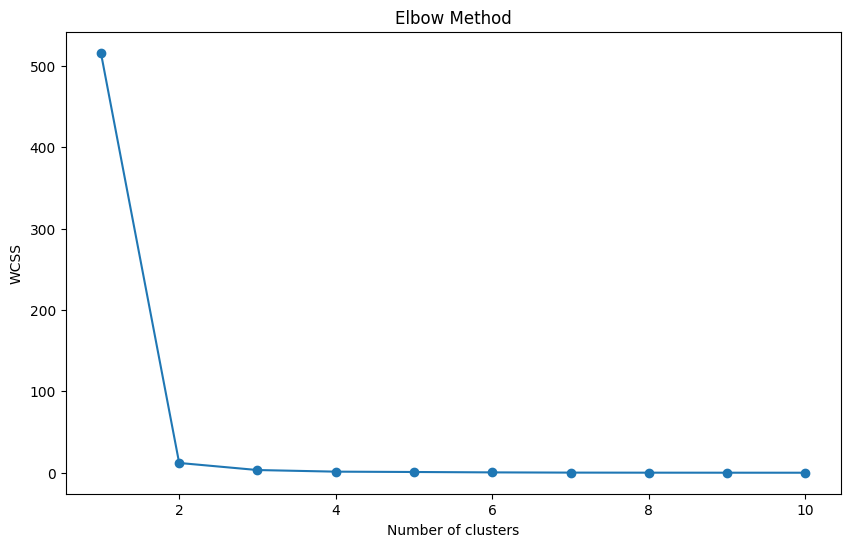

In [45]:
# Filter for export data
df_filtered = dfc_clean[(dfc_clean["Trade"] == "Export")]

# Split the 'Country' column by comma and explode the DataFrame
df_filtered = df_filtered.assign(
    Country=df_filtered["Country"].str.split(", ")
).explode("Country")

# Calculate linear growth rates for trade values
trade_growth = df_filtered.groupby(["Country", "Year"])["Value"].sum().reset_index()

# Calculate the linear growth rate for each country
def calculate_growth_rate(group):
    if len(group) > 1:
        slope, _ = np.polyfit(group["Year"], group["Value"], 1)
        return slope
    return 0

growth_rates = (
    trade_growth.groupby("Country", group_keys=False)
    .apply(lambda x: pd.Series({"Growth_Rate": calculate_growth_rate(x)}))
    .reset_index()
)

# Merge growth rates with the original data
features = (
    df_filtered.groupby("Country")["Value"].mean().reset_index(name="Avg_Trade_Value")
)
features = features.merge(growth_rates, on="Country")

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features.drop(columns=["Country"]))

# Apply PCA for dimensionality reduction (if needed)
pca = PCA(n_components=2)  # You can adjust the number of components as needed
features_pca = pca.fit_transform(features_scaled)

# Inspect the explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Determine the optimal number of clusters using the elbow method
wcss = [
    KMeans(n_clusters=i, random_state=42).fit(features_pca).inertia_
    for i in range(1, 11)
]

# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()


>This graph shows the ideal number of cluster groups to be used.

In [46]:
# Determine the optimal number of clusters using the elbow method
optimal_clusters = 3  # Replace with the optimal number of clusters determined from the elbow plot

# Apply K-means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
features["Cluster"] = kmeans.fit_predict(features_pca)

# Label the clusters based on the growth rates
cluster_labels = {
    0: "Average Performers",
    1: "Top Performers",
    2: "Emerging Performers",
}
features["Performance"] = features["Cluster"].map(cluster_labels)

# Create a DataFrame for visualization
pca_df = pd.DataFrame(features_pca, columns=["PCA1", "PCA2"])
pca_df["Cluster"] = features["Cluster"]
pca_df["Country"] = features["Country"]
pca_df["Performance"] = features["Performance"]

# Plot the clusters using Plotly
fig = px.scatter(
    pca_df,
    x="PCA1",
    y="PCA2",
    color="Performance",
    hover_data=["Country"],
    title="Performance Segmentation of Countries",
    labels={"PCA1": "PCA1", "PCA2": "PCA2"},
)

# Update hover template and layout
fig.update_traces(hovertemplate="Country: %{customdata[0]}")
fig.update_layout(
    title="Exports Performance Segmentation of Countries",
    title_x=0.5,
    xaxis_title="PCA1",
    yaxis_title="PCA2",
)

fig.show()

<a id="m2"></a>
### 3.2 Clustering / Segmentation: FTAs by Yearly Value

/var/folders/2l/98dn0dvj6jx4l166nprz2mc00000gn/T/ipykernel_22537/1207684897.py:22: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



Explained variance ratio: [0.99299792 0.00700208]


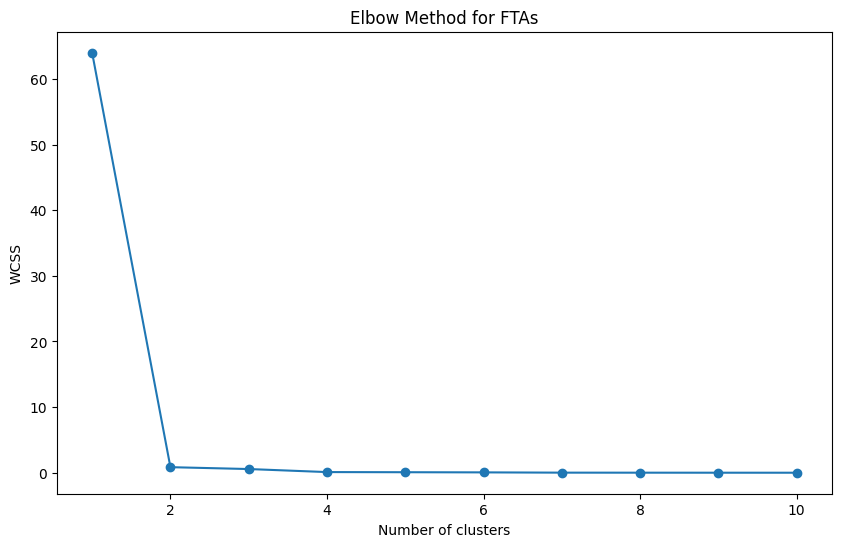

In [47]:
# Filter for export data
df_filtered_fta = df_clean[(df_clean["Trade"] == "Export")]

# Calculate linear growth rates for trade values
trade_growth_fta = (
    df_filtered_fta.groupby(["Free Trade Agreement", "Year"])["Value"]
    .sum()
    .reset_index()
)


# Calculate the linear growth rate for each FTA
def calculate_growth_rate_fta(group):
    if len(group) > 1:
        slope, _ = np.polyfit(group["Year"], group["Value"], 1)
        return slope
    return 0


growth_rates_fta = (
    trade_growth_fta.groupby("Free Trade Agreement")
    .apply(calculate_growth_rate_fta)
    .reset_index(name="Growth_Rate")
)

# Merge growth rates with the original data
features_fta = (
    df_filtered_fta.groupby("Free Trade Agreement")["Value"]
    .mean()
    .reset_index(name="Avg_Trade_Value")
)
features_fta = features_fta.merge(growth_rates_fta, on="Free Trade Agreement")

# Standardize the features
features_scaled_fta = scaler.fit_transform(
    features_fta.drop(columns=["Free Trade Agreement"])
)

# Apply PCA for dimensionality reduction (if needed)
features_pca_fta = pca.fit_transform(features_scaled_fta)

# Inspect the explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Determine the optimal number of clusters using the elbow method
wcss_fta = [
    KMeans(n_clusters=i, random_state=42).fit(features_pca_fta).inertia_
    for i in range(1, 11)
]

# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_fta, marker="o")
plt.title("Elbow Method for FTAs")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()


>This graph shows the ideal number of cluster groups to be used.

In [48]:
# Apply K-means with the optimal number of clusters
optimal_clusters_fta = (
    3  # Replace with the optimal number of clusters determined from the elbow plot
)
kmeans_fta = KMeans(n_clusters=optimal_clusters_fta, random_state=42)
features_fta["Cluster"] = kmeans_fta.fit_predict(features_pca_fta)

# Label the clusters based on the growth rates
cluster_labels_fta = {
    0: "Low Performers",
    2: "Moderate Performers",
    1: "Top Performers",
}
features_fta["Performance"] = features_fta["Cluster"].map(cluster_labels_fta)

# Create a DataFrame for visualization
pca_df_fta = pd.DataFrame(features_pca_fta, columns=["PCA1", "PCA2"])
pca_df_fta = pca_df_fta.assign(
    Cluster=features_fta["Cluster"],
    FreeTradeAgreement=features_fta["Free Trade Agreement"],
    Performance=features_fta["Performance"],
)

# Plot the clusters using Plotly
fig_fta = px.scatter(
    pca_df_fta,
    x="PCA1",
    y="PCA2",
    color="Performance",
    hover_data=["FreeTradeAgreement"],
    title="Performance Segmentation of Free Trade Agreements",
    labels={"PCA1": "PCA1", "PCA2": "PCA2"},
)

# Update hover template and layout
fig_fta.update_traces(hovertemplate="FTA: %{customdata[0]}")
fig_fta.update_layout(
    title="Exports Performance Segmentation of Free Trade Agreements",
    title_x=0.5,
    xaxis_title="PCA1",
    yaxis_title="PCA2",
)

fig_fta.show()

### Conclusion and Review of Results

The United States emerges as Canada's most crucial ally, with a substantial portion of exports directed there. This data is particularly relevant in the context of recent unnecessary "Trade Wars," highlighting the importance of maintaining strong trade ties with the U.S. Additionally, the segmentation analysis identifies the United Kingdom and China as emerging performers, showing promising growth rates and increasing trade values, indicating their potential as key trade partners for Canada in the future.

The Comprehensive and Progressive Agreement for Trans-Pacific Partnership (CPTPP) stands out as a significant trade agreement for Canada, including countries like Australia, Japan, and Mexico. This agreement provides Canada with access to diverse markets, enhancing its trade potential and economic growth. By leveraging these insights, policymakers and businesses can make informed decisions to strengthen Canada's trade relationships and drive economic growth.

<a id="m3"></a>
### 3.3 SARIMA Forecast for Exports

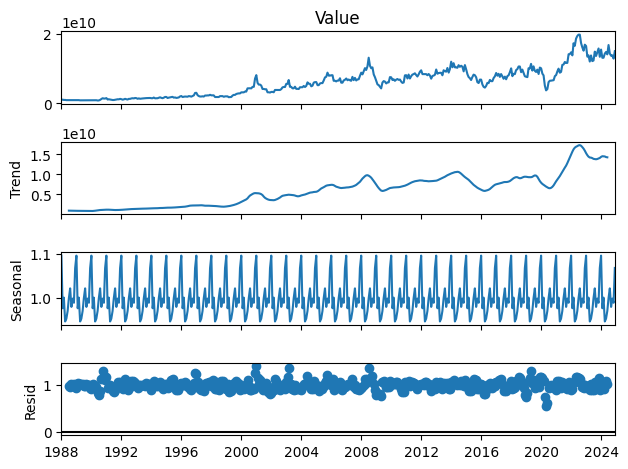

                                     SARIMAX Results                                      
Dep. Variable:                              Value   No. Observations:                  444
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -9469.263
Date:                            Sat, 22 Feb 2025   AIC                          18948.527
Time:                                    21:35:10   BIC                          18968.857
Sample:                                01-01-1988   HQIC                         18956.554
                                     - 12-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2023      0.435     -0.465      0.642      -1.055       0.651
ma.L1          0.0412      0.434   

In [49]:
# Decompose the time series for a specific FTA or product category
def decompose_time_series(data, column, model="multiplicative"):
    decomposition = seasonal_decompose(data[column], model=model)
    decomposition.plot()
    plt.show()
    return decomposition

# Example: Decompose the time series for 'Canada-United States-Mexico Agreement (CUSMA), preceeded by NAFTA' and 'Energy products'
fta = "Canada-United States-Mexico Agreement (CUSMA), preceeded by NAFTA"
product = "Energy products"

# Filter the data for CUSMA and only exports
fta_product_data_cusma = df_clean[
    (df_clean["Free Trade Agreement"] == fta) & 
    (df_clean["Description"] == product) & 
    (df_clean["Trade"] == "Export")
].copy()

# Ensure the Date column is created from Year and Month
fta_product_data_cusma["Date"] = pd.to_datetime(
    fta_product_data_cusma[["Year", "Month"]].assign(DAY=1)
)
fta_product_data_cusma.set_index("Date", inplace=True)

# Set the frequency to monthly and forward fill missing values
fta_product_data_cusma = fta_product_data_cusma.asfreq("MS").ffill()

# Decompose the time series
decomposition = decompose_time_series(fta_product_data_cusma, "Value")

# Fit a SARIMA model to capture and model seasonality
sarima_model = SARIMAX(
    fta_product_data_cusma["Value"], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)
)
sarima_result = sarima_model.fit()

# Print the summary of the SARIMA model
print(sarima_result.summary())


>The SARIMA model effectively captures both trend and seasonality, but residual diagnostics indicate that there may be remaining structure in the data. The model provides a strong foundation for forecasting trends in the dataset.

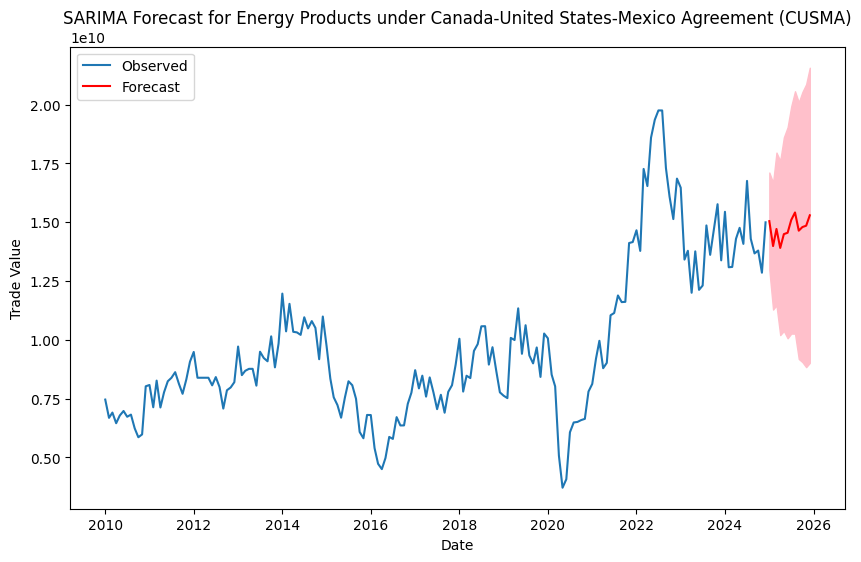

In [50]:
# Filter the data from 2010 onwards
fta_product_data_2010 = fta_product_data_cusma[fta_product_data_cusma.index >= "2010-01-01"]

# Forecast the next 12 months
forecast = sarima_result.get_forecast(steps=12)
forecast_df = forecast.conf_int()
forecast_df["Forecast"] = forecast.predicted_mean

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(fta_product_data_2010["Value"], label="Observed")
plt.plot(forecast_df["Forecast"], label="Forecast", color="red")
plt.fill_between(
    forecast_df.index,
    forecast_df["lower Value"],
    forecast_df["upper Value"],
    color="pink",
)
plt.title("SARIMA Forecast for Energy Products under Canada-United States-Mexico Agreement (CUSMA)")
plt.xlabel("Date")
plt.ylabel("Trade Value")
plt.legend()
plt.show()

Energy is the main industry exported from Canada, as shown in the Distribution chart. Over the last 10 years, the trend indicates that there is not much growth expected for Canadian exports, suggesting a general slowdown in economic growth. Although there was a significant surge in exports following the COVID-19 crisis, reaching historic highs, it is unlikely that these peaks will be achieved again in the near future. This highlights the need for strategic planning and diversification to sustain economic stability and growth.

## [**4. Tableau Dashboard**](https://public.tableau.com/views/CanadaTrade/FTADashboard?:language=en-US&:sid=&:display_count=n&:origin=viz_share_link)

Two interactive dashboards, one for each dataset.

As the final step from this project, feel free to navigate through these dashboards, including fruitful insights whose interactivity will help any Canadian who is willing to explore the foreign trade market.